In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants, units
from astropy.coordinates import Angle
from scipy.optimize import curve_fit
import pandas as pd
import os
from scipy.signal import medfilt
from astropy.wcs import WCS
import scipy.integrate as integrate
from astropy.coordinates import SkyCoord
import dustmaps
import extinction

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/HST_images/'

Load in the image, segmentation map, and catalog file for filters

In [3]:
img_fits_814w = fits.open(rootdir+'f814wdrc.fits')
seg_fits_814w = fits.open(rootdir+'f814w_seg.fits')
cat_file_814w = np.loadtxt(rootdir + 'f814w.cat')

In [4]:
img_fits_140w = fits.open(rootdir+'f140w_comb.fits')
seg_fits_140w = fits.open(rootdir+'f140w_seg.fits')
cat_file_140w = np.loadtxt(rootdir + 'f140w.cat')

In [5]:
img_fits_160w = fits.open(rootdir+'f160w_comb.fits')
seg_fits_160w = fits.open(rootdir+'f160w_seg.fits')
cat_file_160w = np.loadtxt(rootdir + 'f160w.cat')

In [14]:
np.sqrt(img_fits_160w[0].header['CD1_1']**2 + img_fits_160w[0].header['CD1_2']**2)

3.548981253483356e-05

# z=0.0966

## F814W

In [6]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==4656)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/238994802.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/238994802.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


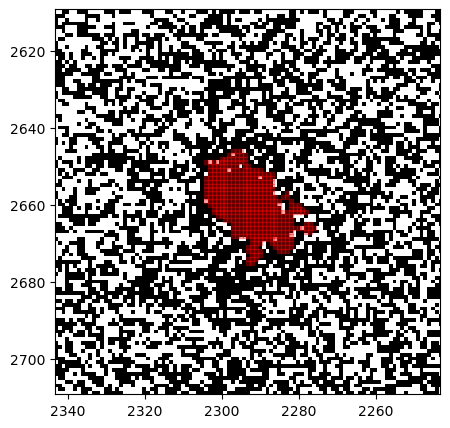

In [7]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.3)

dwin = 50
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()

In [8]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [9]:
np.round(mag,3)

23.803

## F140W

In [10]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==265)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)-0.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -40*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)
#idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(704.6860465116279, 744.6860465116279)

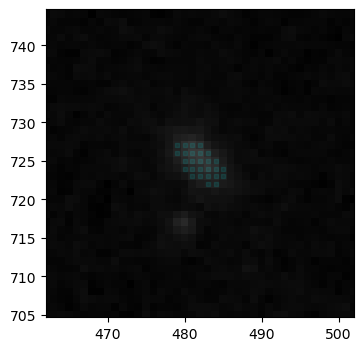

In [11]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [19]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [20]:
np.round(mag,3)

23.097

## F160W

In [21]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==286)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(708.452380952381, 748.452380952381)

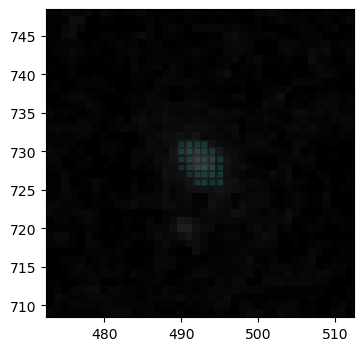

In [22]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [23]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [24]:
np.round(mag,3)

22.655

## F160W (Limiting mag)

In [26]:
x0, y0 = 510, 750
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.9)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.9)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_93786/1408254284.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_93786/1408254284.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(730.0, 770.0)

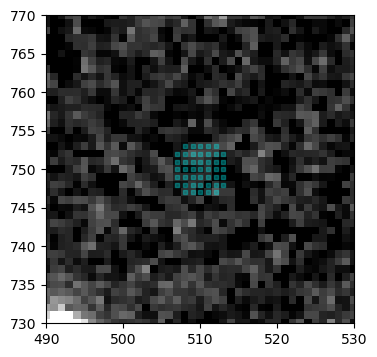

In [27]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.9, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.3)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [28]:
counts_arr = []

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_arr.append(img_fits_160w[0].data[y,x])

(array([2., 3., 3., 6., 5., 8., 9., 5., 2., 2.]),
 array([0.5000419 , 0.5057343 , 0.5114267 , 0.5171191 , 0.52281153,
        0.5285039 , 0.5341963 , 0.53988874, 0.54558116, 0.5512735 ,
        0.55696595], dtype=float32),
 <BarContainer object of 10 artists>)

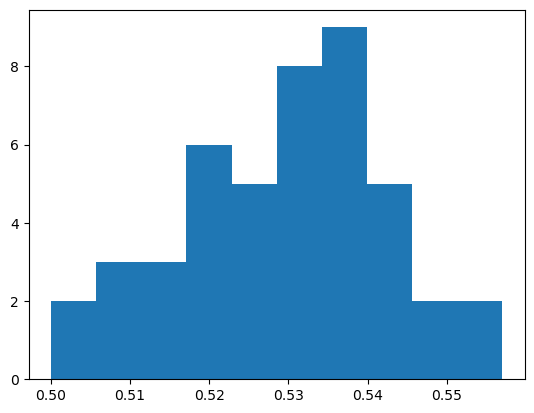

In [29]:
plt.hist(counts_arr)

In [37]:
flux_tot = 5*np.std(counts_arr)*np.sqrt(len(gal_x))*img_fits_160w[0].header['PHOTFNU']

In [38]:
mag = -2.5*np.log10(flux_tot/3631)

In [39]:
mag

26.84042802458982

# z=0.1203

## F814W

In [29]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==4179)
x0, y0 = np.median(seg_map_gal_x)+5, np.median(seg_map_gal_y)-15
A = -10*np.pi/180
idx = np.where((((seg_map_gal_x-x0)*np.cos(A)+(seg_map_gal_y-y0)*np.sin(A))/45)**2+(((seg_map_gal_x-x0)*np.sin(A)-(seg_map_gal_y-y0)*np.cos(A))/15)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2180228490.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2180228490.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


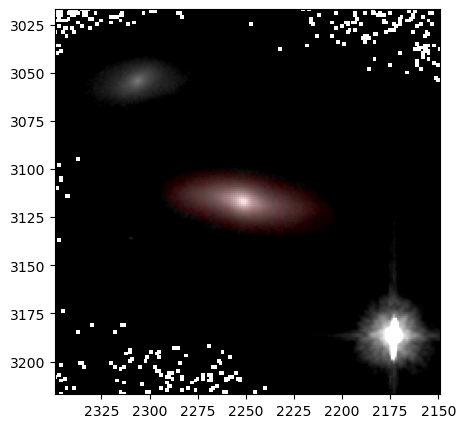

In [30]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.01)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [31]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [32]:
np.round(mag,3)

18.03

## F140W

In [36]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==397)
x0, y0 = np.mean(seg_map_gal_x)-11, np.mean(seg_map_gal_y)+5
A = -6*np.pi/180
idx = np.where((((seg_map_gal_x-x0)*np.cos(A)+(seg_map_gal_y-y0)*np.sin(A))/25)**2+(((seg_map_gal_x-x0)*np.sin(A)-(seg_map_gal_y-y0)*np.cos(A))/13)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3354568659.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3354568659.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(507.32855255708625, 587.3285525570863)

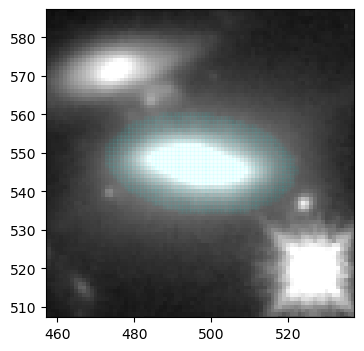

In [37]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.03)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [38]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [39]:
np.round(mag,3)

16.898

## F160W

In [40]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==547)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)+6
A = -6*np.pi/180
idx = np.where((((seg_map_gal_x-x0)*np.cos(A)+(seg_map_gal_y-y0)*np.sin(A))/25)**2+(((seg_map_gal_x-x0)*np.sin(A)-(seg_map_gal_y-y0)*np.cos(A))/13)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2288028646.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2288028646.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(509.92731224341946, 589.9273122434195)

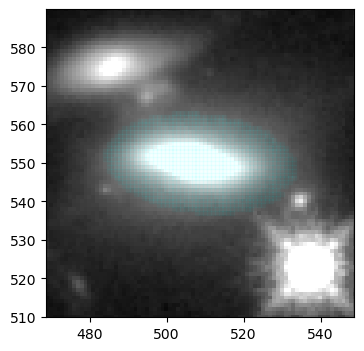

In [41]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.03)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [42]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [43]:
np.round(mag,3)

16.789

# z=0.1204

## F814W

In [47]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5074)
x0, y0 = np.median(seg_map_gal_x)+5, np.median(seg_map_gal_y)-4
A = 16*np.pi/180
idx = np.where((((seg_map_gal_x-x0)*np.cos(A)+(seg_map_gal_y-y0)*np.sin(A))/25)**2+(((seg_map_gal_x-x0)*np.sin(A)-(seg_map_gal_y-y0)*np.cos(A))/14)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3911885469.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3911885469.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


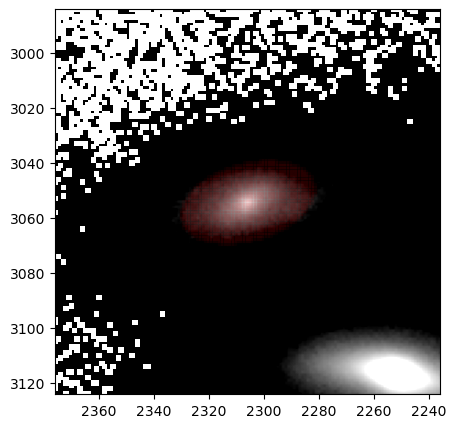

In [48]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.03)

dwin = 70
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [49]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [50]:
np.round(mag,3)

19.784

## F140W

In [51]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==396)
x0, y0 = np.mean(seg_map_gal_x)-7, np.mean(seg_map_gal_y)-6.5
A = 16*np.pi/180
idx = np.where((((seg_map_gal_x-x0)*np.cos(A)+(seg_map_gal_y-y0)*np.sin(A))/22)**2+(((seg_map_gal_x-x0)*np.sin(A)-(seg_map_gal_y-y0)*np.cos(A))/8)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2038595851.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2038595851.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(532.1085223789087, 612.1085223789087)

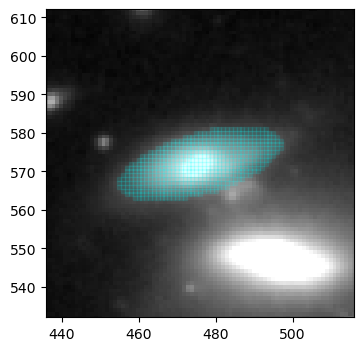

In [52]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [53]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [54]:
np.round(mag,3)

18.48

## F160W

In [55]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==544)
x0, y0 = np.mean(seg_map_gal_x)-10, np.mean(seg_map_gal_y)-7
A = 16*np.pi/180
idx = np.where((((seg_map_gal_x-x0)*np.cos(A)+(seg_map_gal_y-y0)*np.sin(A))/22)**2+(((seg_map_gal_x-x0)*np.sin(A)-(seg_map_gal_y-y0)*np.cos(A))/8)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/135309120.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/135309120.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(535.3831744988498, 615.3831744988498)

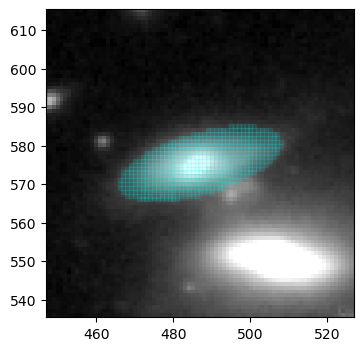

In [56]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [57]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [58]:
np.round(mag,3)

18.369

# z=0.1264

## F814W

In [59]:
x0, y0 = 2340, 2903
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/14)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


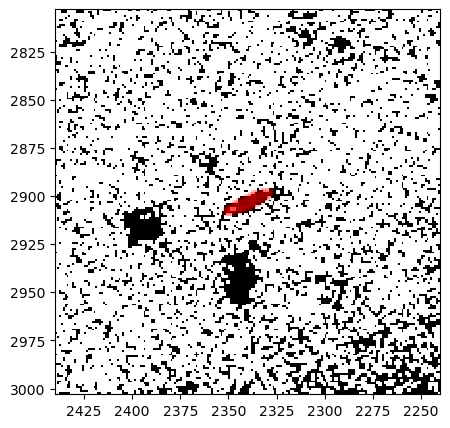

In [60]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [61]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [62]:
np.round(mag,3)

25.431

## F140W

In [63]:
x0, y0 = 463.5, 630.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(610.5, 650.5)

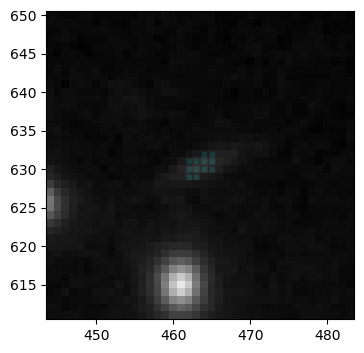

In [64]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [65]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [66]:
np.round(mag,3)

23.78

## F160W

In [67]:
x0, y0 = 475, 634
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(614.0, 654.0)

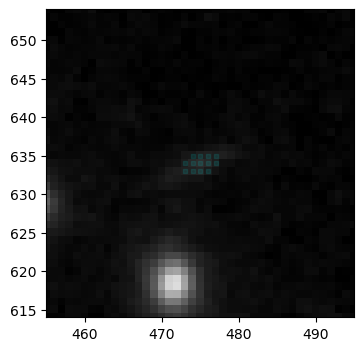

In [68]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [69]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [70]:
np.round(mag,3)

23.555

# z=0.1335

## F814W

In [71]:
x0, y0 = 1783, 3451
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/10)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


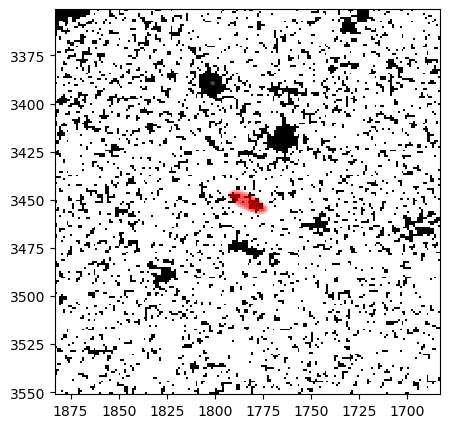

In [72]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [73]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [74]:
np.round(mag,3)

26.456

## F140W

In [75]:
x0, y0 = 679, 414
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/1.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(394.0, 434.0)

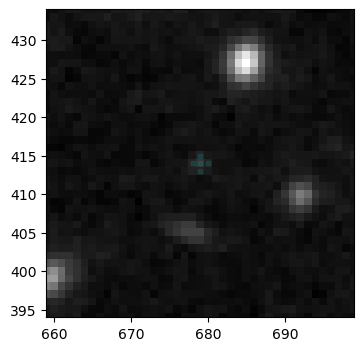

In [76]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [77]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [78]:
np.round(mag,3)

24.939

## F160W

In [79]:
x0, y0 = 689, 417
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/1.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(397.0, 437.0)

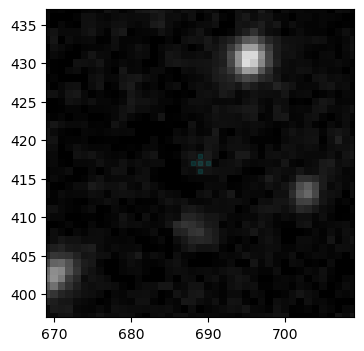

In [80]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [81]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [82]:
np.round(mag,3)

24.807

# z=0.1393

## F814W

In [85]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==4638)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2601763000.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2601763000.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


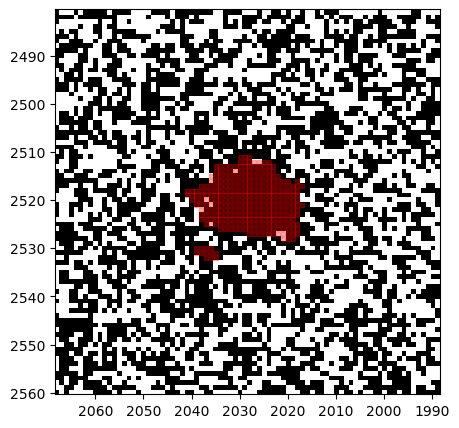

In [86]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.3)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [87]:
counts_tot = 0

for i in list(idx[0]):
    x = seg_map_gal_x[i]
    y = seg_map_gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [88]:
np.round(mag,3)

23.797

## F140W

In [89]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==214)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)+.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(759.0, 799.0)

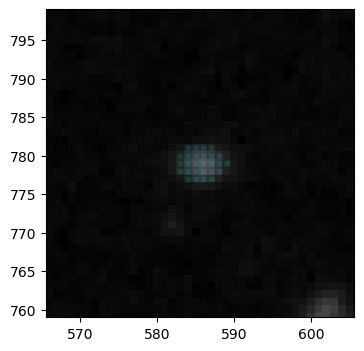

In [90]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [91]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [92]:
np.round(mag,3)

22.784

## F160W

In [93]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==239)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(762.3904761904762, 802.3904761904762)

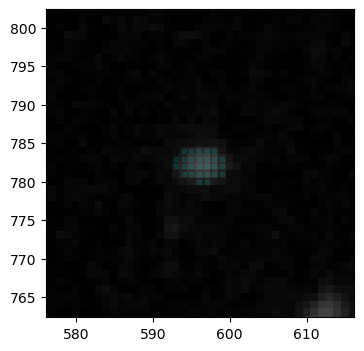

In [94]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [95]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [96]:
np.round(mag,3)

22.655

# z=0.2791

## F814W

In [97]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7918)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 70*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/15)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/8)**2<1)
#idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2011892100.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2011892100.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


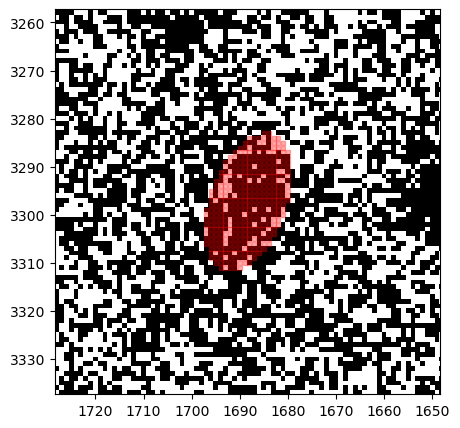

In [98]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.3)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [99]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [100]:
np.round(mag,3)

25.358

## F140W

In [101]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==530)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)
#idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2344048877.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2344048877.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(458.1235294117647, 488.1235294117647)

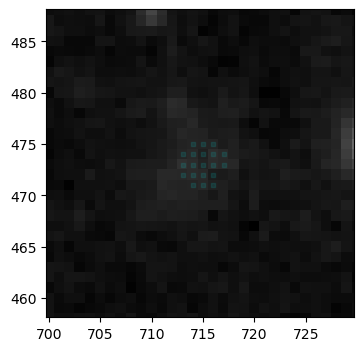

In [102]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 15
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

#ax.invert_yaxis()
#ax.invert_xaxis()

In [103]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [104]:
np.round(mag,3)

23.432

## F160W

In [105]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==541)
x0, y0 = np.mean(seg_map_gal_x)+1.5, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)
#idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/978276392.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/978276392.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(462.6746031746032, 492.6746031746032)

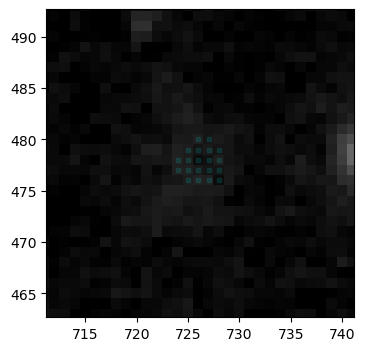

In [106]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 15
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [107]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [108]:
np.round(mag,3)

23.282

# z=0.2915

## F814W

In [119]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7228)
x0, y0 = np.mean(seg_map_gal_x)+1., np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -15*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/11)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2011892100.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2011892100.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


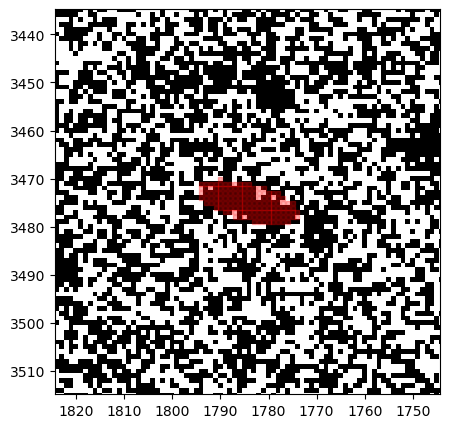

In [120]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.3)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [121]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [122]:
np.round(mag,3)

25.617

## F140W

In [114]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==656)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)

idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<2**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9620/1439497277.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9620/1439497277.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(385.2093023255814, 425.2093023255814)

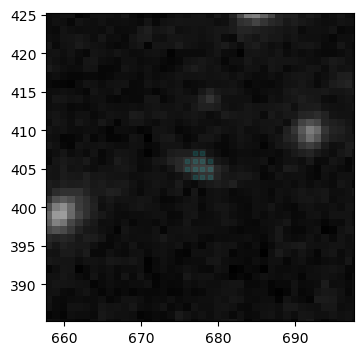

In [115]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [116]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [117]:
np.round(mag,3)

23.838

## F160W

In [118]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==620)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)

idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<2**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9620/3955960080.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9620/3955960080.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(393.6756756756757, 423.6756756756757)

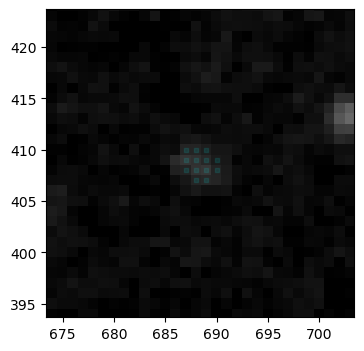

In [119]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 15
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [120]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [121]:
np.round(mag,3)

23.676

# z=0.3198

## F814W

In [123]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6535)
x0, y0 = np.mean(seg_map_gal_x)-4, np.mean(seg_map_gal_y)-2
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 40*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/40)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/8)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


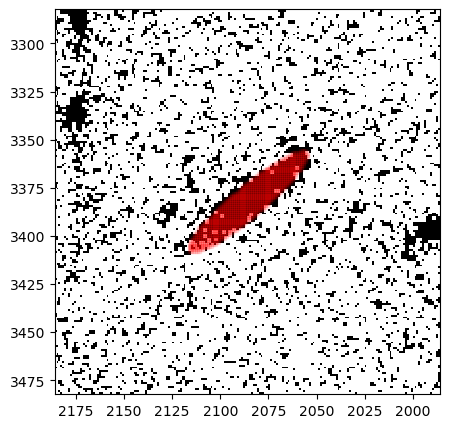

In [124]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [125]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [126]:
np.round(mag,3)

23.027

## F140W

In [127]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==556)
x0, y0 = np.mean(seg_map_gal_x)-2, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 37*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/8.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)
#idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(422.3837535014006, 462.3837535014006)

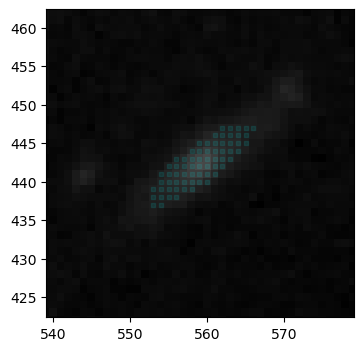

In [128]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [129]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [130]:
np.round(mag,3)

21.89

## F160W

In [131]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==563)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)-1.5
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 37*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/8.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(425.54013377926424, 465.54013377926424)

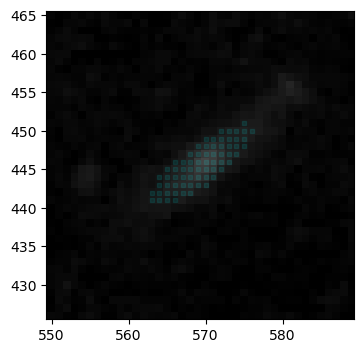

In [132]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [133]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [134]:
np.round(mag,3)

21.746

# z=0.3286

## F814W

In [236]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5792)
x0, y0 = np.mean(seg_map_gal_x)+2.75, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/10)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/10)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_5080/872194404.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_5080/872194404.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


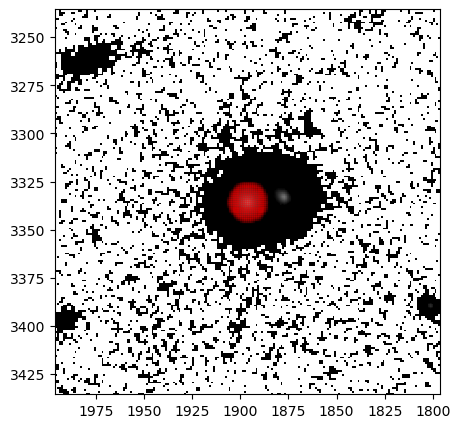

In [237]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [238]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [239]:
np.round(mag,3)

20.638

## F140W

In [284]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==529)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5.)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_5080/1940551093.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_5080/1940551093.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(439.57575757575756, 479.57575757575756)

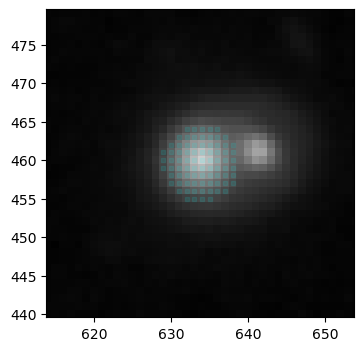

In [285]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [286]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [287]:
np.round(mag,3)

19.609

## F160W

In [288]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==534)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5.)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_5080/4076356211.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_5080/4076356211.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(444.10083036773426, 484.10083036773426)

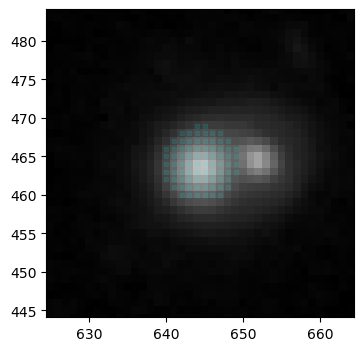

In [289]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [290]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [291]:
np.round(mag,3)

19.494

# z=0.3752

## F814W

In [135]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6421)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)+5
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/20)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


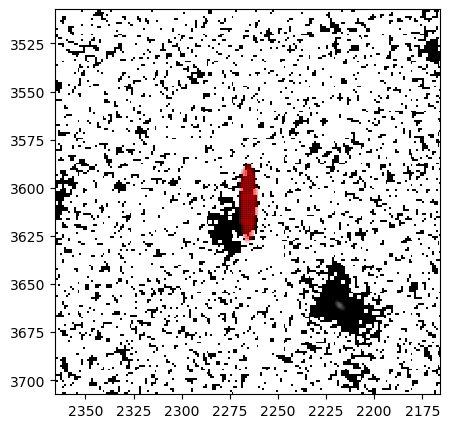

In [136]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [137]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [138]:
np.round(mag,3)

24.418

## F140W

In [139]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==701)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(335.6330275229358, 375.6330275229358)

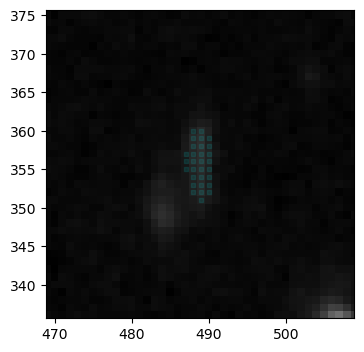

In [140]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [141]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [142]:
np.round(mag,3)

22.834

## F160W

In [143]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==705)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(339.75531914893617, 379.75531914893617)

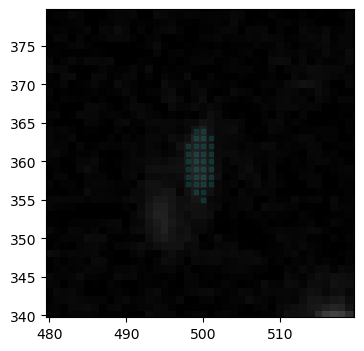

In [144]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [145]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [146]:
np.round(mag,3)

22.624

# z=0.3759

## F814W

In [147]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5843)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<13**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2601763000.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2601763000.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


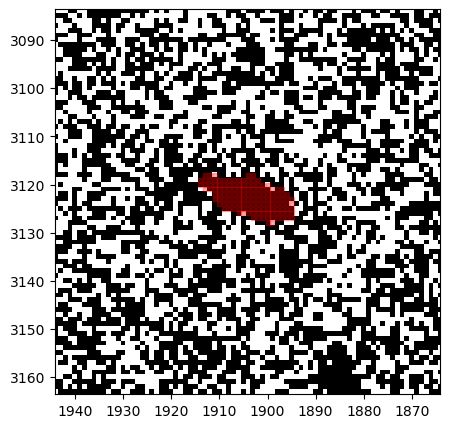

In [148]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.3)

dwin = 40
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [149]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [150]:
np.round(mag,3)

25.077

## F140W

In [151]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==469)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)-1.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.7)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(523.0116279069767, 563.0116279069767)

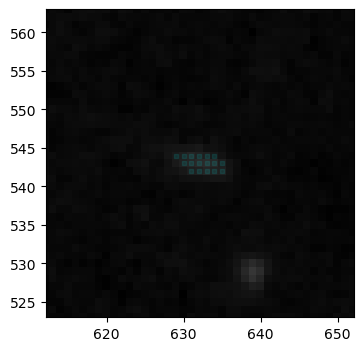

In [152]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [153]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [154]:
np.round(mag,3)

23.472

## F160W

In [155]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==489)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(526.5, 566.5)

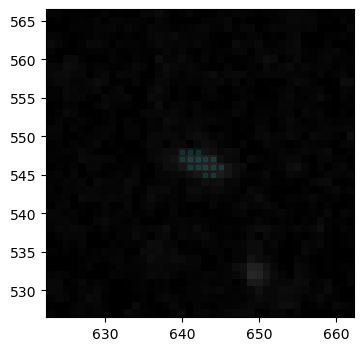

In [156]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [157]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [158]:
np.round(mag,3)

23.441

# z=0.4395

## F814W

In [159]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7039)
x0, y0 = np.mean(seg_map_gal_x)-2, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/10)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/7)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


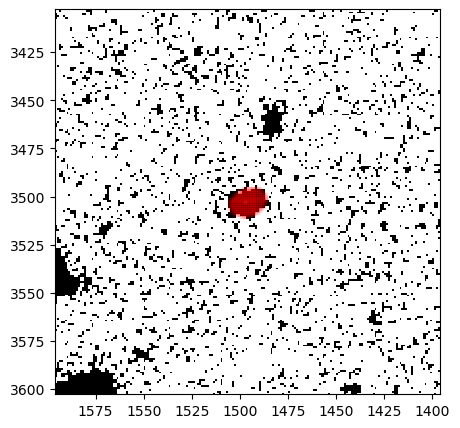

In [160]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [161]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [162]:
np.round(mag,3)

23.55

## F140W

In [163]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==667)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)-.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(372.99305555555554, 412.99305555555554)

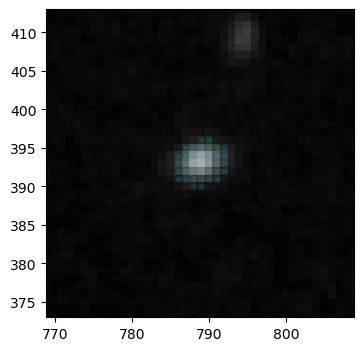

In [164]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [165]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [166]:
np.round(mag,3)

22.146

## F160W

In [167]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==631)
x0, y0 = np.mean(seg_map_gal_x)+1, np.mean(seg_map_gal_y)+.5
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(376.8333333333333, 416.8333333333333)

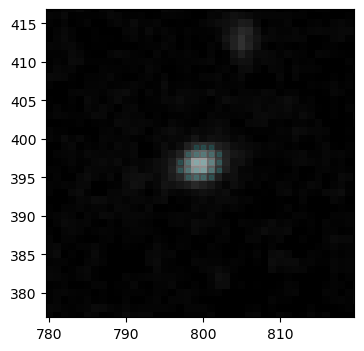

In [168]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [169]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [170]:
np.round(mag,3)

22.313

# z=0.4581

## F814W

In [171]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6346)
x0, y0 = np.mean(seg_map_gal_x)-.5, np.mean(seg_map_gal_y)-1.2
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/14)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/12)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


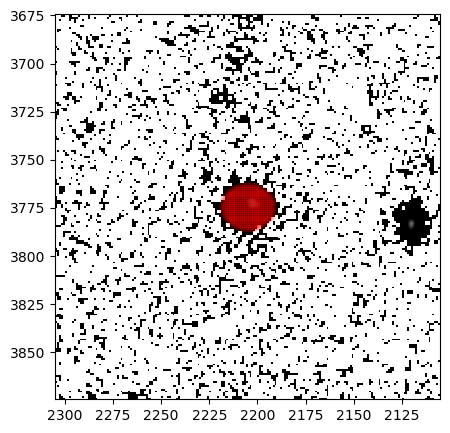

In [172]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [173]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [174]:
np.round(mag,3)

22.217

## F140W

In [175]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==781)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)+.25
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 40*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/6)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(270.10393258426967, 310.10393258426967)

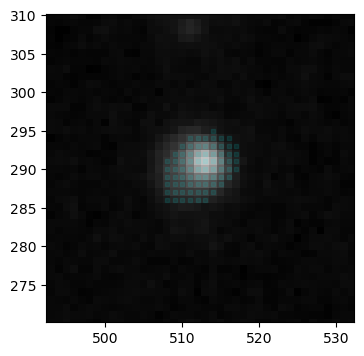

In [176]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [177]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [178]:
np.round(mag,3)

21.346

## F160W

In [179]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==757)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 40*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(273.51, 313.51)

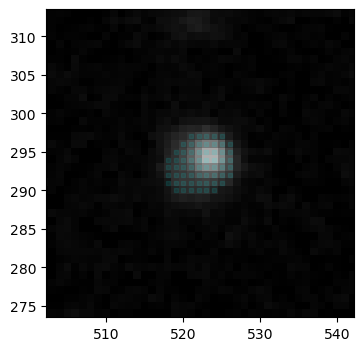

In [180]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [181]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [182]:
np.round(mag,3)

21.363

# z=0.4784

## F814W

In [183]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==4524)
x0, y0 = np.mean(seg_map_gal_x)+3, np.mean(seg_map_gal_y)+5
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 55*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/20)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/12)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/357979870.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/357979870.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


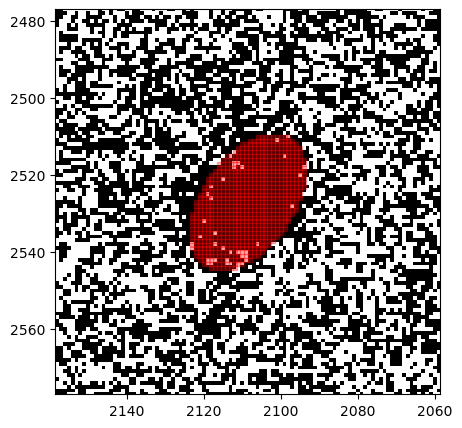

In [184]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.3)

dwin = 50
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [185]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [186]:
np.round(mag,3)

23.194

## F140W

In [187]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==211)
x0, y0 = np.mean(seg_map_gal_x)+2, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 70*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/6)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(757.046332046332, 797.046332046332)

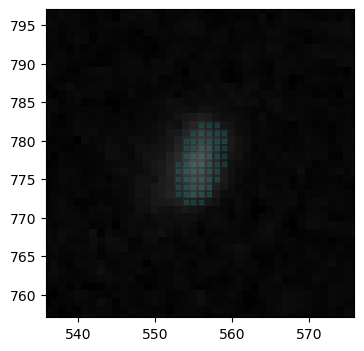

In [188]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [189]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [190]:
np.round(mag,3)

21.987

## F160W

In [191]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==237)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 70*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(760.5221674876848, 800.5221674876848)

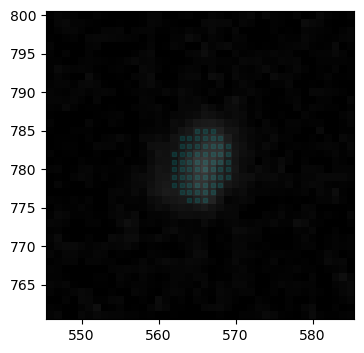

In [192]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [193]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [194]:
np.round(mag,3)

21.776

# z=0.5191

## F814W

In [195]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7253)
x0, y0 = np.mean(seg_map_gal_x)-1.5, np.mean(seg_map_gal_y)-1.5
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -55*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/15)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/9)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


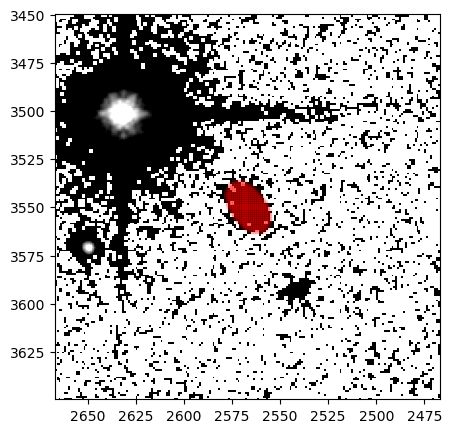

In [196]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [197]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [198]:
np.round(mag,3)

23.149

## F140W

In [199]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==594)
x0, y0 = np.mean(seg_map_gal_x)+1.5, np.mean(seg_map_gal_y)-3
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -55*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(358.98098859315587, 398.98098859315587)

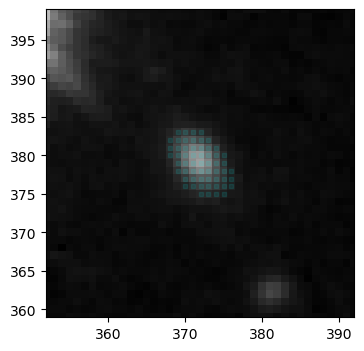

In [200]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [201]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [202]:
np.round(mag,3)

21.69

## F160W

In [203]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==593)
x0, y0 = np.mean(seg_map_gal_x)+2.5, np.mean(seg_map_gal_y)-2
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -50*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(362.24464831804283, 402.24464831804283)

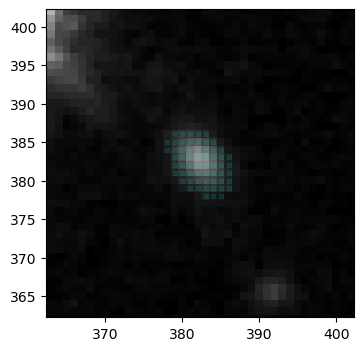

In [204]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [205]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [206]:
np.round(mag,3)

21.535

# z=0.5205

## F814W

In [207]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7824)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/18)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/9.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


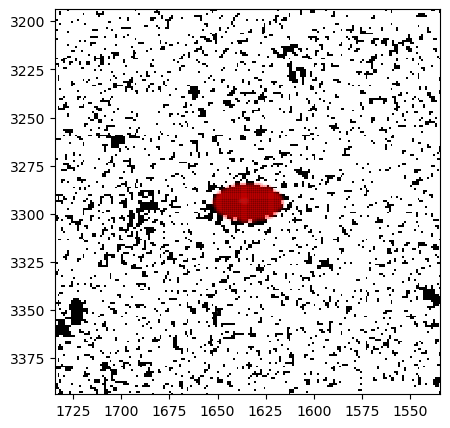

In [208]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [209]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [210]:
np.round(mag,3)

22.342

## F140W

In [211]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==584)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(454.97694524495677, 494.97694524495677)

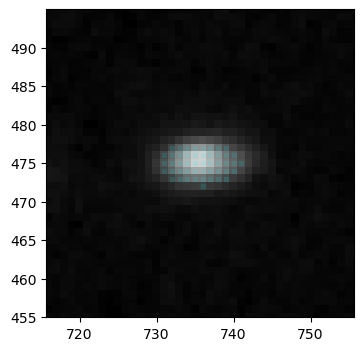

In [212]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [213]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [214]:
np.round(mag,3)

21.384

## F160W

In [215]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==538)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.75)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(458.8599348534202, 498.8599348534202)

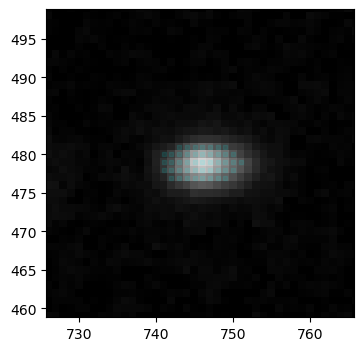

In [216]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [217]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [218]:
np.round(mag,3)

21.272

# z=0.5257

## F814W

In [219]:
x0, y0 = 1942, 2495
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


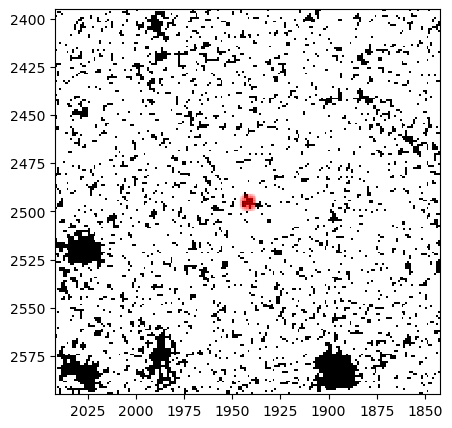

In [220]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [221]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [222]:
np.round(mag,3)

26.789

## F140W

In [223]:
x0, y0 = 619, 788
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/1.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1590490224.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1590490224.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(768.0, 808.0)

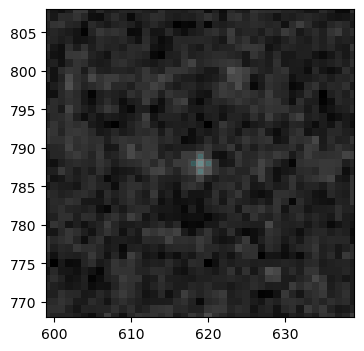

In [224]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.8, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [225]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [226]:
np.round(mag,3)

24.939

## F160W

In [227]:
x0, y0 = 630, 791
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -25*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/1.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2134250451.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2134250451.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(771.0, 811.0)

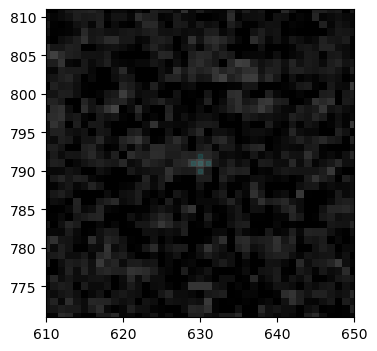

In [228]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.8, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [229]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [230]:
np.round(mag,3)

24.801

# z=0.5356

## F814W

In [231]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6281)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/23)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/23)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/872194404.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/872194404.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


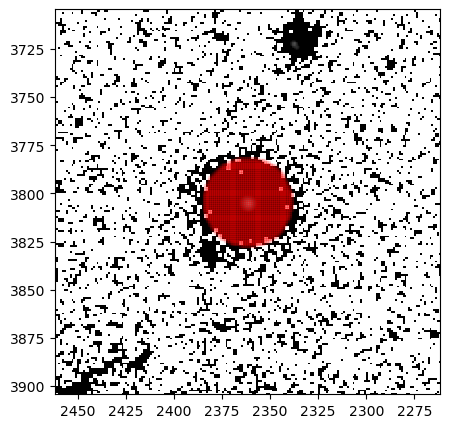

In [232]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [233]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [234]:
np.round(mag,3)

21.132

## F140W

In [235]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==787)
x0, y0 = np.mean(seg_map_gal_x)-.5, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1940551093.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1940551093.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(258.84122562674094, 298.84122562674094)

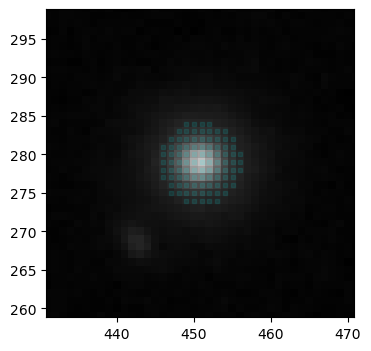

In [236]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [237]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [238]:
np.round(mag,3)

20.225

## F160W

In [239]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==759)
x0, y0 = np.mean(seg_map_gal_x)-.5, np.mean(seg_map_gal_y)-1.5
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4076356211.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4076356211.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(262.2808022922636, 302.2808022922636)

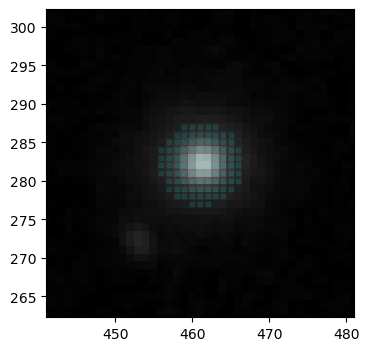

In [240]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [241]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [242]:
np.round(mag,3)

20.069

# z=0.5723

## F814W

In [243]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5522)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/16)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/16)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/872194404.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/872194404.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


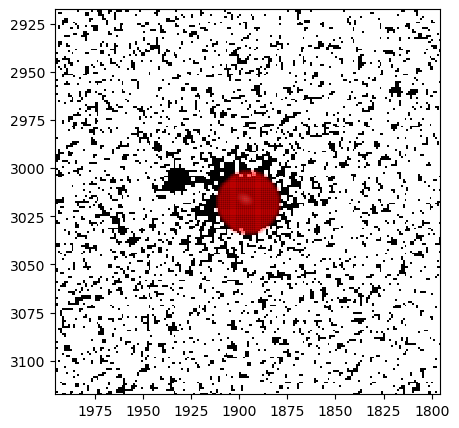

In [244]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [245]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [246]:
np.round(mag,3)

21.719

## F140W

In [247]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==431)
x0, y0 = np.mean(seg_map_gal_x)-1.25, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1940551093.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1940551093.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(564.645266594124, 604.645266594124)

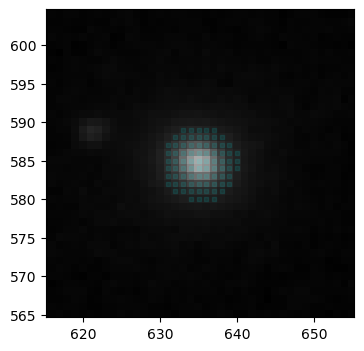

In [248]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [249]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [250]:
np.round(mag,3)

20.567

## F160W

In [251]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==464)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)+.25
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4076356211.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4076356211.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(567.9149937264742, 607.9149937264742)

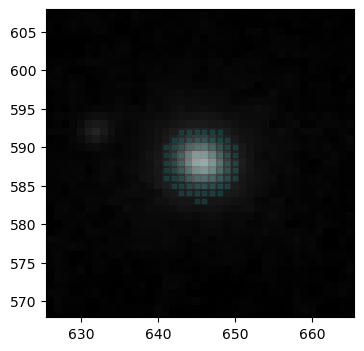

In [252]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [253]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [254]:
np.round(mag,3)

20.415

# z=0.6164

## F814W

In [255]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5733)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/11)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/8)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


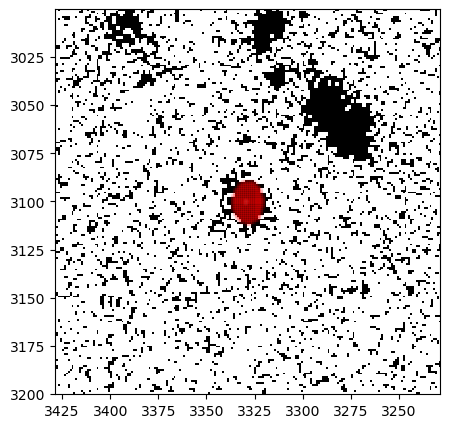

In [256]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [257]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [258]:
np.round(mag,3)

23.3

## F140W

In [259]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==329)
x0, y0 = np.mean(seg_map_gal_x)+1, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -60*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(538.1475903614457, 578.1475903614457)

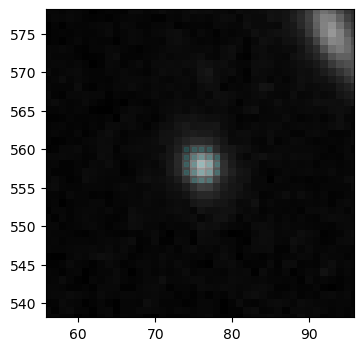

In [260]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [261]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [262]:
np.round(mag,3)

22.469

## F160W

In [263]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==433)
x0, y0 = np.mean(seg_map_gal_x)+7, np.mean(seg_map_gal_y)+2
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -60*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(541.2029177718833, 581.2029177718833)

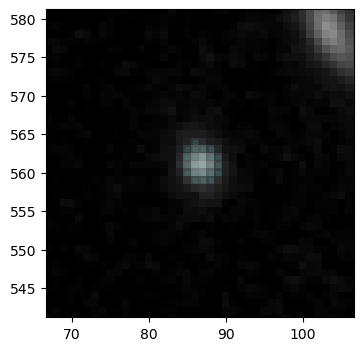

In [264]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [265]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [266]:
np.round(mag,3)

22.305

# z=0.6174

## F814W

In [267]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7211)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/7)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


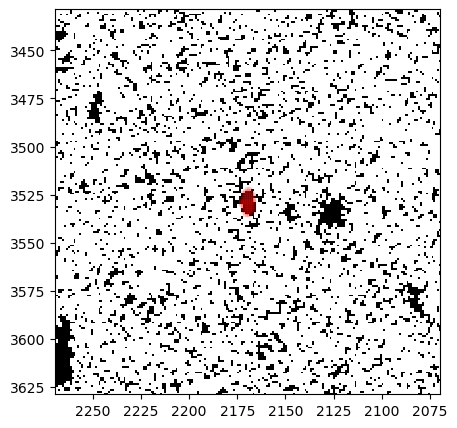

In [268]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [269]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [270]:
np.round(mag,3)

25.294

## F140W

In [271]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==671)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -60*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(365.9047619047619, 405.9047619047619)

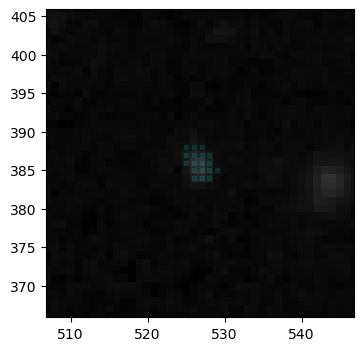

In [272]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [273]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [274]:
np.round(mag,3)

23.433

## F160W

In [275]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==639)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -60*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(368.85, 408.85)

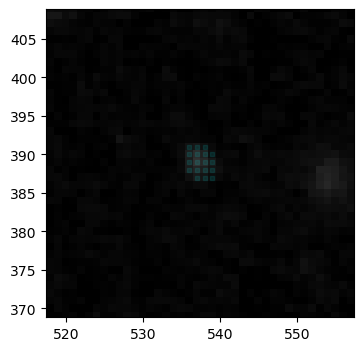

In [276]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [277]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [278]:
np.round(mag,3)

23.254

# z=0.6178

## F814W

In [279]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7001)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)+1
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/15)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/10)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


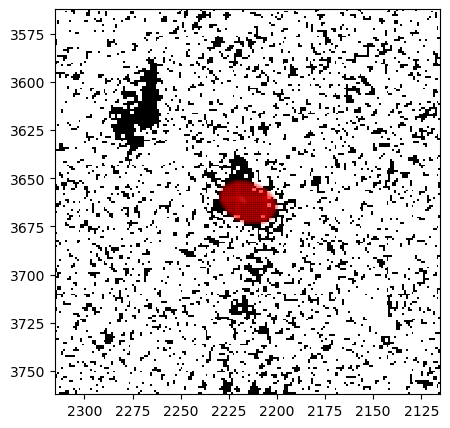

In [280]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [281]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [282]:
np.round(mag,3)

22.839

## F140W

In [283]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==733)
x0, y0 = np.mean(seg_map_gal_x)-.5, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(313.8929889298893, 353.8929889298893)

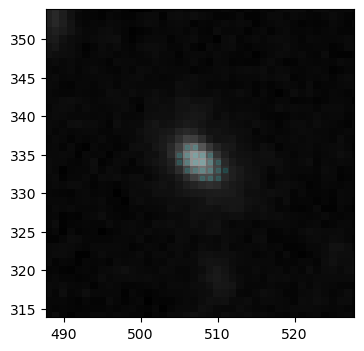

In [284]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [285]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [286]:
np.round(mag,3)

22.519

## F160W

In [287]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==706)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -20*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(317.20512820512823, 357.20512820512823)

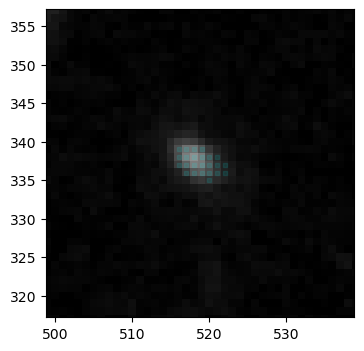

In [288]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [289]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [290]:
np.round(mag,3)

22.357

# z=0.6183

## F814W

In [291]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7008)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -85*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/10.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/9)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


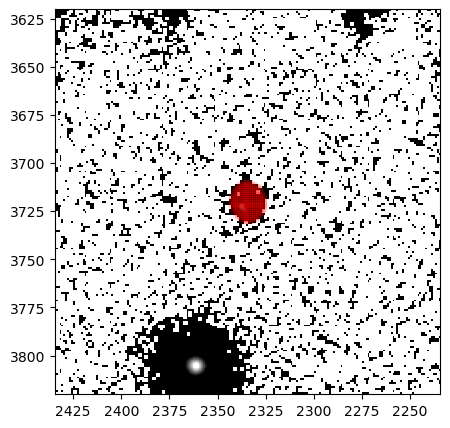

In [292]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [293]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [294]:
np.round(mag,3)

23.222

## F140W

In [295]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==760)
x0, y0 = np.mean(seg_map_gal_x)-1.75, np.mean(seg_map_gal_y)-1.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(290.8636363636364, 330.8636363636364)

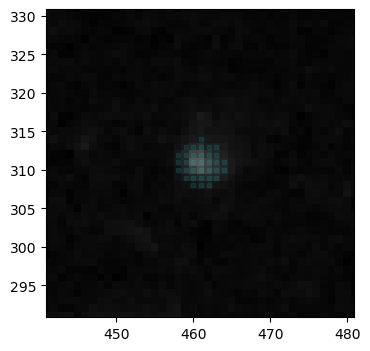

In [296]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [297]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [298]:
np.round(mag,3)

22.613

## F160W

In [299]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==728)
x0, y0 = np.mean(seg_map_gal_x)-.5, np.mean(seg_map_gal_y)-.75
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(294.43110236220474, 334.43110236220474)

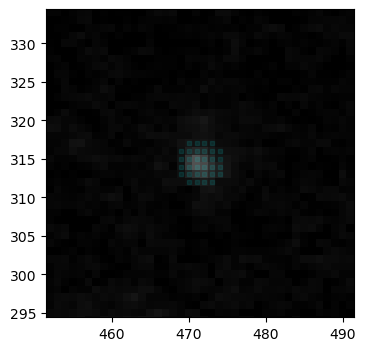

In [300]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [301]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [302]:
np.round(mag,3)

22.531

# z=0.6469

## F814W

In [303]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5186)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 55*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/10.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


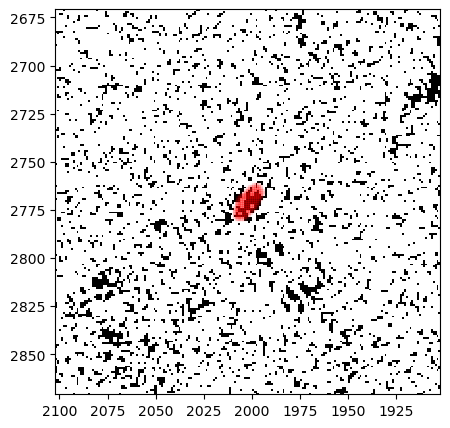

In [304]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [305]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [306]:
np.round(mag,3)

25.688

## F140W

In [307]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==317)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(660.8775510204082, 700.8775510204082)

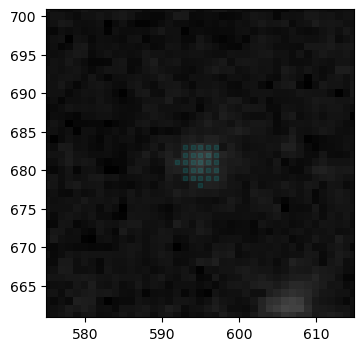

In [308]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [309]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [310]:
np.round(mag,3)

23.091

## F160W

In [311]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==351)
x0, y0 = np.mean(seg_map_gal_x)-.25, np.mean(seg_map_gal_y)+.25
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 0*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(663.891975308642, 703.891975308642)

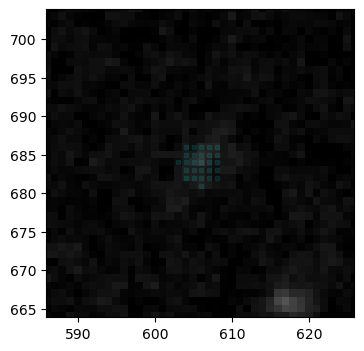

In [312]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [313]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [314]:
np.round(mag,3)

22.944

# z=0.6478

## F814W

In [327]:
x0, y0 = 2278, 3625
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -50*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/10)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


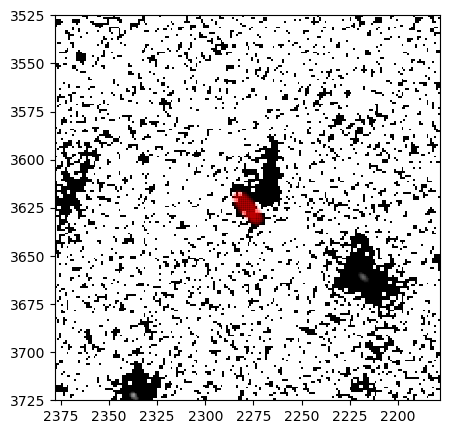

In [328]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [329]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [330]:
np.round(mag,3)

25.258

## F140W

In [331]:
x0, y0 = 484.5, 348.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -70*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(328.5, 368.5)

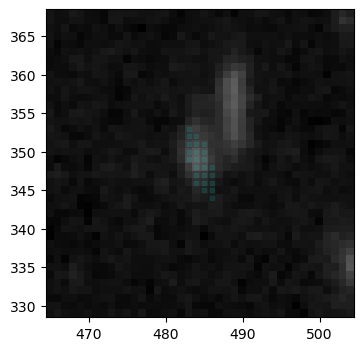

In [332]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [333]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [334]:
np.round(mag,3)

23.13

## F160W

In [335]:
x0, y0 = 495.5, 351
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -70*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2134250451.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2134250451.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(331.0, 371.0)

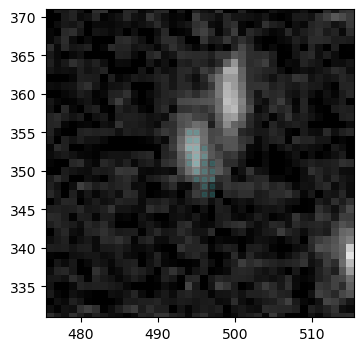

In [336]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.8, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [337]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [338]:
np.round(mag,3)

22.991

# z=0.6518

## F814W

In [365]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6561)
x0, y0 = np.mean(seg_map_gal_x)-3, np.mean(seg_map_gal_y)-3
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/35)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/13)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


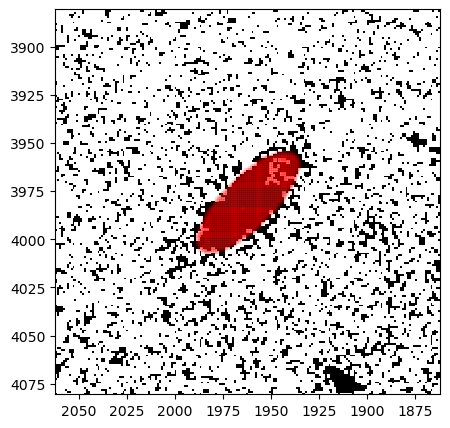

In [366]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [367]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [369]:
np.round(mag,3)

22.175

## F140W

In [370]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==885)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/7)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/591021627.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(187.77596741344195, 227.77596741344195)

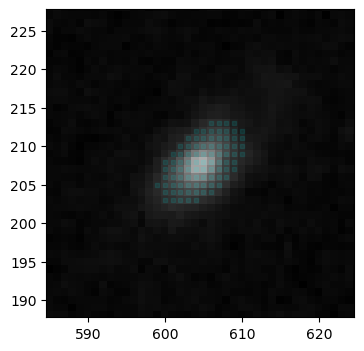

In [371]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [372]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [373]:
np.round(mag,3)

21.234

## F160W

In [374]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==898)
x0, y0 = np.mean(seg_map_gal_x)+1, np.mean(seg_map_gal_y)+1
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/7)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1271740363.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(191.09259259259258, 231.09259259259258)

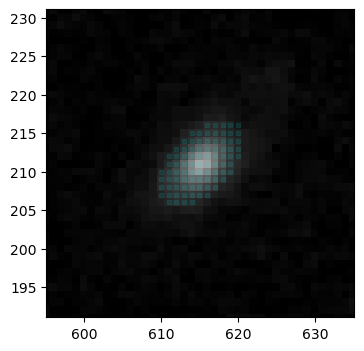

In [375]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [376]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [377]:
np.round(mag,3)

21.109

# z=0.6531

## F814W

In [378]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5836)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 65*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/12)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/10)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


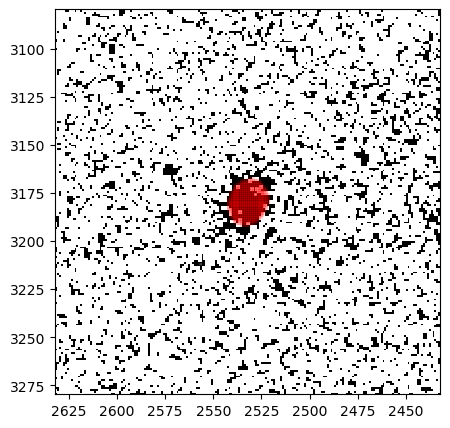

In [379]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [380]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [381]:
np.round(mag,3)

24.187

## F140W

In [382]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==480)
x0, y0 = np.mean(seg_map_gal_x)+.3, np.mean(seg_map_gal_y)-3.0
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1176966187.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(503.5138121546961, 543.5138121546961)

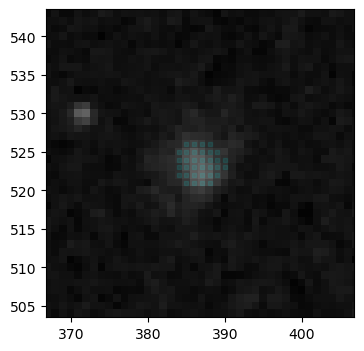

In [383]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [384]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [385]:
np.round(mag,3)

22.697

## F160W

In [386]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==503)
x0, y0 = np.mean(seg_map_gal_x)+.75, np.mean(seg_map_gal_y)-1.75
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3.25)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3.25)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(507.0362068965517, 547.0362068965517)

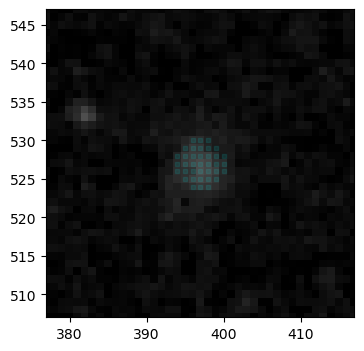

In [387]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [388]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [389]:
np.round(mag,3)

22.483

# z=0.6780

## F814W

In [390]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7247)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3786552547.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3786552547.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


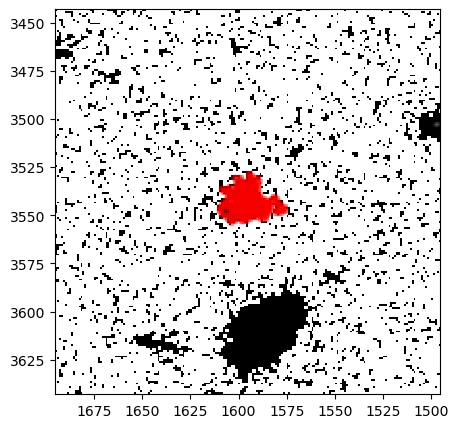

In [391]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.3)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [392]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [393]:
np.round(mag,3)

23.634

## F140W

In [394]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==681)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)+0

idx = np.where(((seg_map_gal_x-x0-1)/4)**2+((seg_map_gal_y-y0)/2.5)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1201674757.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1201674757.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(357.27685950413223, 397.27685950413223)

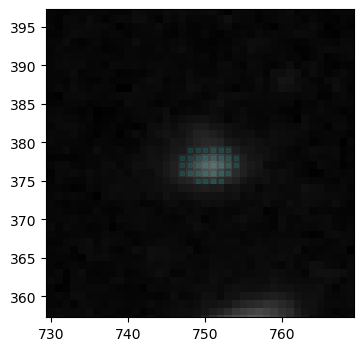

In [395]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [396]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [397]:
np.round(mag,3)

22.512

## F160W

In [398]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==642)
x0, y0 = np.mean(seg_map_gal_x)-0.25, np.mean(seg_map_gal_y)-0.2

idx = np.where(((seg_map_gal_x-x0)/4.75)**2+((seg_map_gal_y-y0)/2.)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2793059292.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2793059292.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(360.6563829787234, 400.6563829787234)

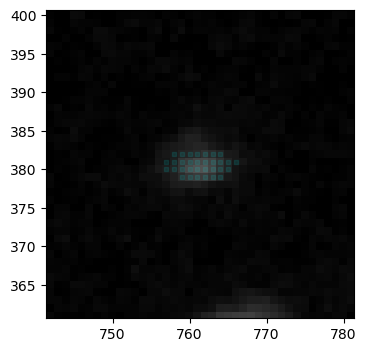

In [399]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [400]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [401]:
np.round(mag,3)

22.415

# z=0.7010

## F814W

In [402]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5660)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)+3
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 40*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/15)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/15)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


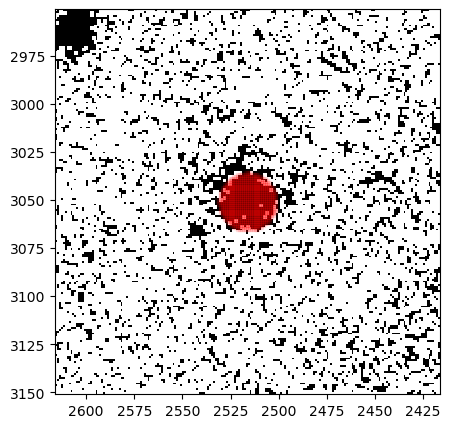

In [403]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [404]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [405]:
np.round(mag,3)

23.335

## F140W

In [406]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==438)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3012349225.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3012349225.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


[]

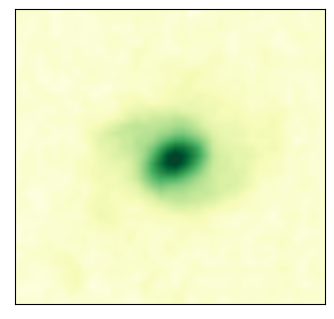

In [407]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-19.4, cmap='YlGn', interpolation='bilinear')

#ax.scatter(gal_x, gal_y, marker='s',  
#           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin-1,x0+dwin)
ax.set_ylim(y0-dwin+1,y0+dwin)
ax.set_xticks([])
ax.set_yticks([])
#plt.savefig('/Users/thepoetoftwilight/Desktop/z_07.png', dpi=300)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(554.4423076923077, 594.4423076923077)

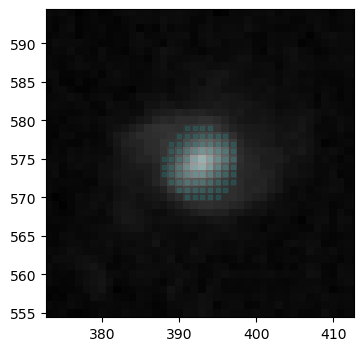

In [408]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [409]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [410]:
np.round(mag,3)

21.244

## F160W

In [411]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==477)
x0, y0 = np.mean(seg_map_gal_x)-2.2, np.mean(seg_map_gal_y)-.75
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(558.2215370018976, 598.2215370018976)

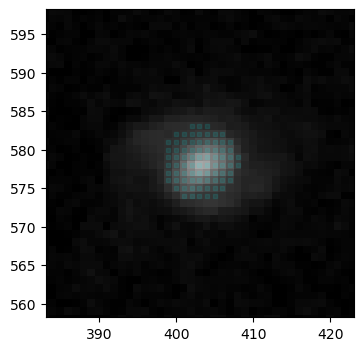

In [412]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [413]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [414]:
np.round(mag,3)

21.078

# z=0.7293

## F814W

In [415]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5820)
x0, y0 = np.mean(seg_map_gal_x)+1, np.mean(seg_map_gal_y)+3
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/16)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/10)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


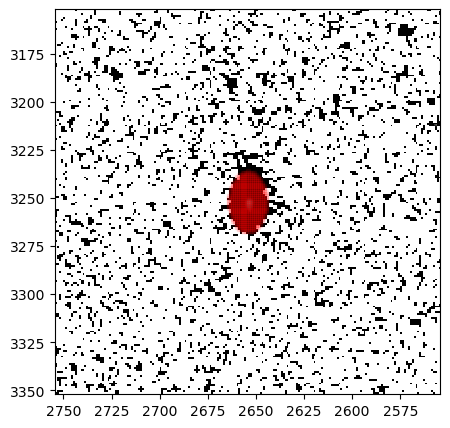

In [416]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [417]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [418]:
np.round(mag,3)

22.33

## F140W

In [419]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==497)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)-2.5
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(476.17, 516.1700000000001)

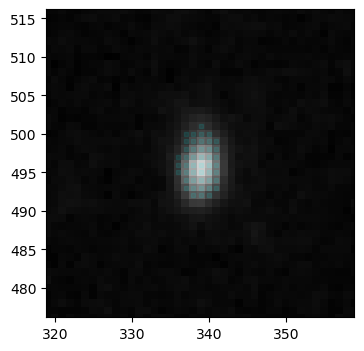

In [420]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [421]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [422]:
np.round(mag,3)

21.577

## F160W

In [423]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==514)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)-.75
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(478.29089219330854, 518.2908921933085)

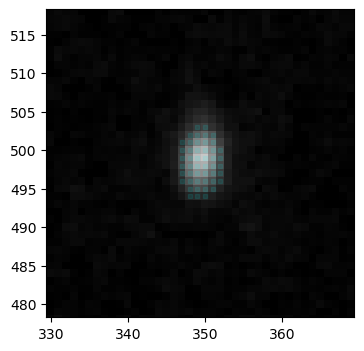

In [424]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [425]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [426]:
np.round(mag,3)

21.419

# z=0.8217

## F814W

In [427]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6903)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/11)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/9)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


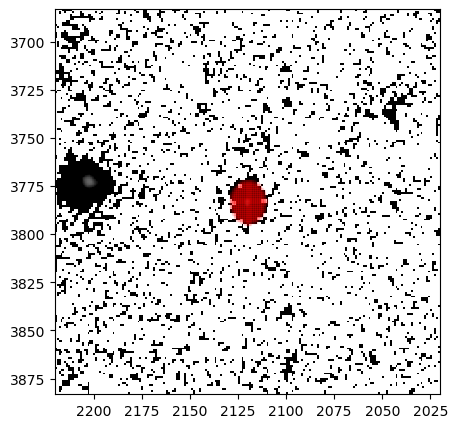

In [428]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [429]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [430]:
np.round(mag,3)

23.215

## F140W

In [431]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==785)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(266.725, 306.725)

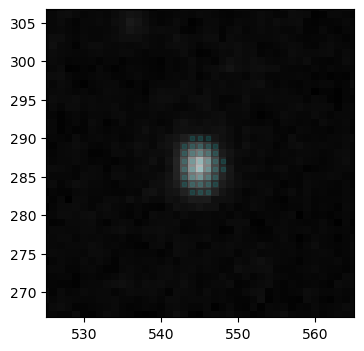

In [432]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [433]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [434]:
np.round(mag,3)

22.064

## F160W

In [435]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==762)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(269.9015151515151, 309.9015151515151)

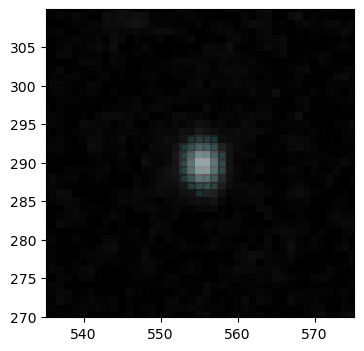

In [436]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [437]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [438]:
np.round(mag,3)

21.953

# z=0.8404

## F814W

In [439]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6976)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/12)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/7)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


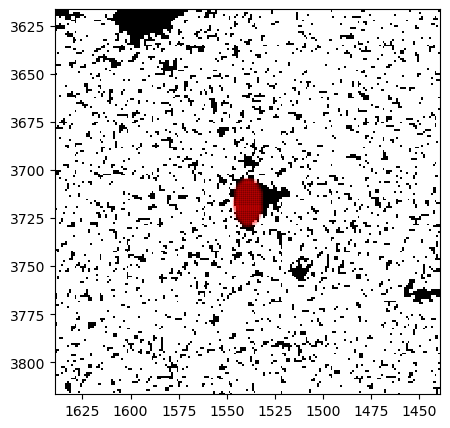

In [440]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [441]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [442]:
np.round(mag,3)

23.367

## F140W

In [443]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==758)
x0, y0 = np.mean(seg_map_gal_x)-2, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2267767439.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(290.34736842105264, 330.34736842105264)

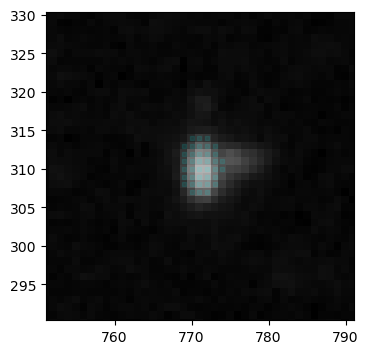

In [444]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-19., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [445]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [446]:
np.round(mag,3)

21.864

## F160W

In [447]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==727)
x0, y0 = np.mean(seg_map_gal_x)-2.5, np.mean(seg_map_gal_y)-2
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 90*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/4)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(293.47232472324725, 333.47232472324725)

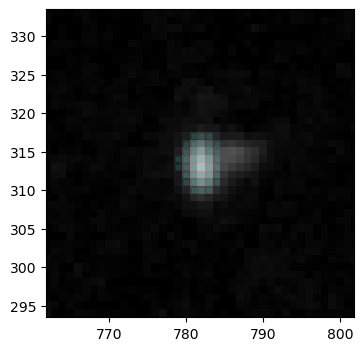

In [448]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [449]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [450]:
np.round(mag,3)

21.706

# z=0.8458

## F814W

In [451]:
x0, y0 = 1878, 3333
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -85*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/6)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/6)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2250915901.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


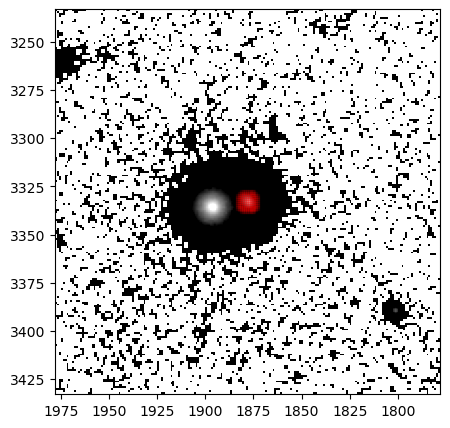

In [452]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [453]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [454]:
np.round(mag,3)

22.388

## F140W

In [455]:
x0, y0 = 641.5, 461
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1940551093.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1940551093.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(441.0, 481.0)

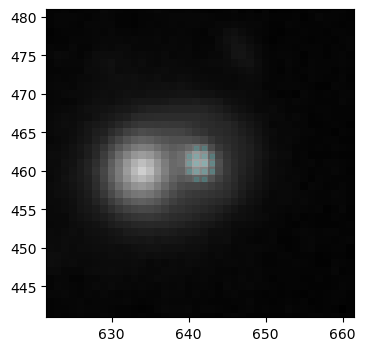

In [456]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [457]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [458]:
np.round(mag,3)

21.283

## F160W

In [459]:
x0, y0 = 652, 464.5
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4076356211.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4076356211.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(444.5, 484.5)

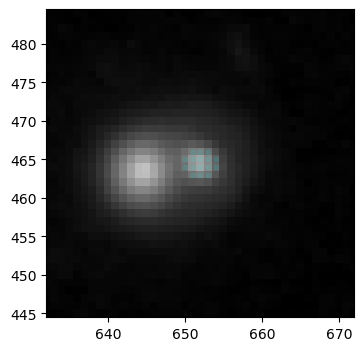

In [460]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [461]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [462]:
np.round(mag,3)

21.115

# z=0.9576

## F814W

In [463]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==6446)
x0, y0 = np.mean(seg_map_gal_x)+1, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/24)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/13)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/823074394.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/823074394.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


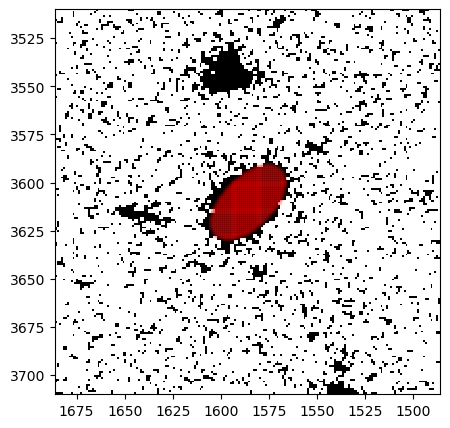

In [464]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [465]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [466]:
np.round(mag,3)

22.363

## F140W

In [467]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==698)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/7)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1166432847.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1166432847.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(332.4438305709024, 372.4438305709024)

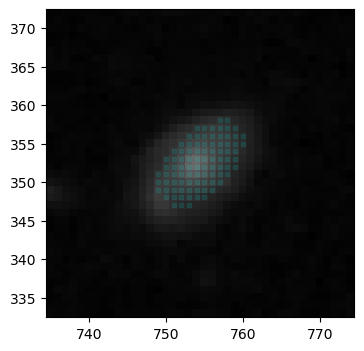

In [468]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-18.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [469]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [470]:
np.round(mag,3)

21.06

## F160W

In [471]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==666)
x0, y0 = np.mean(seg_map_gal_x)-.75, np.mean(seg_map_gal_y)+1
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/7)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/4)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(335.76171079429736, 375.76171079429736)

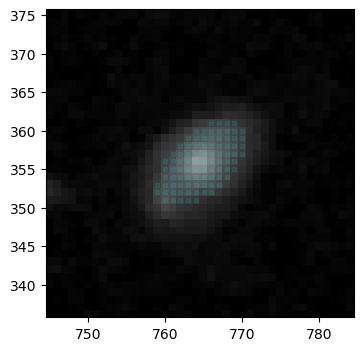

In [472]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [473]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [474]:
np.round(mag,3)

20.925

# z=1.0959

## F814W

In [475]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5066)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<40**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3931600650.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3931600650.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


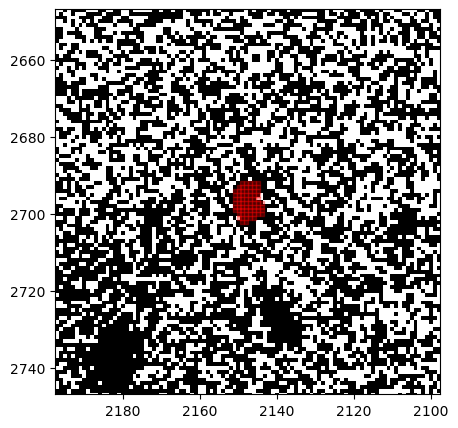

In [476]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.3)

dwin = 50
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [477]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [478]:
np.round(mag,3)

25.533

## F140W

In [479]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==281)
x0, y0 = np.mean(seg_map_gal_x)-1, np.mean(seg_map_gal_y)+0

idx = np.where(((seg_map_gal_x-x0-1)/2)**2+((seg_map_gal_y-y0)/2)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2684113105.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2684113105.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(700.3555555555556, 720.3555555555556)

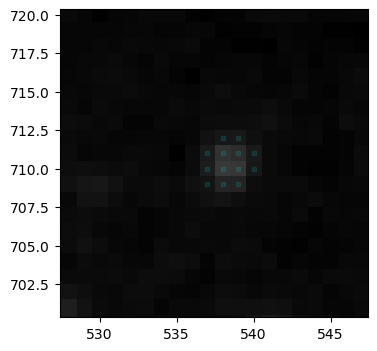

In [480]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 10
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [481]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [482]:
np.round(mag,3)

23.742

## F160W

In [483]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==301)
x0, y0 = np.mean(seg_map_gal_x)-1.25, np.mean(seg_map_gal_y)-.5

idx = np.where(((seg_map_gal_x-x0)/2.5)**2+((seg_map_gal_y-y0)/2.5)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/463418278.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/463418278.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(703.8666666666667, 723.8666666666667)

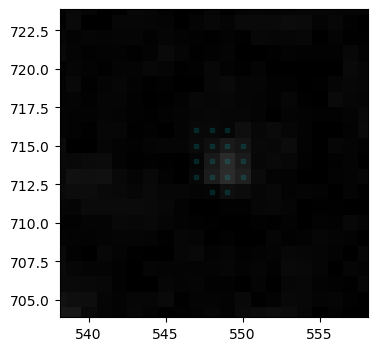

In [484]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 10
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [485]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [486]:
np.round(mag,3)

23.388

# z=1.1932

## F814W

In [499]:
x0, y0 = 2139, 2728
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -55*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/6)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2461408547.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2461408547.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


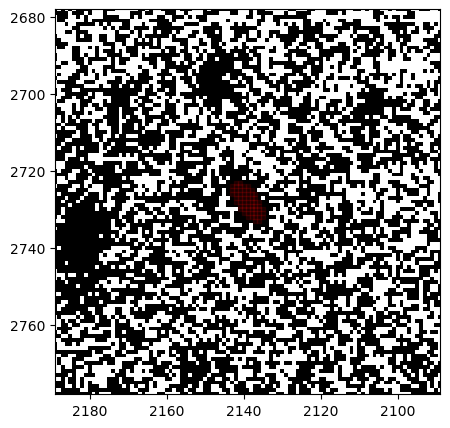

In [500]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 50
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [501]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [502]:
np.round(mag,3)

25.776

## F140W

In [503]:
x0, y0 = 541.5, 698
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -35*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1317446554.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1317446554.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(678.0, 718.0)

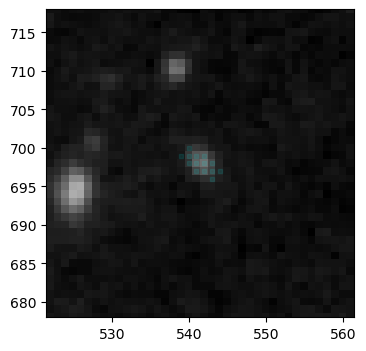

In [504]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [505]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [506]:
np.round(mag,3)

23.678

## F160W

In [507]:
x0, y0 = 552.5, 701.5
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = -35*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/1.5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/532223628.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(681.5, 721.5)

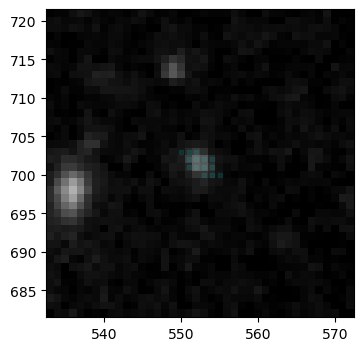

In [508]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [509]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [510]:
np.round(mag,3)

23.51

# z=1.1935

## F814W

In [523]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==4705)
x0, y0 = np.mean(seg_map_gal_x)+2.5, np.mean(seg_map_gal_y)+4
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/10)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/10)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/823074394.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/823074394.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


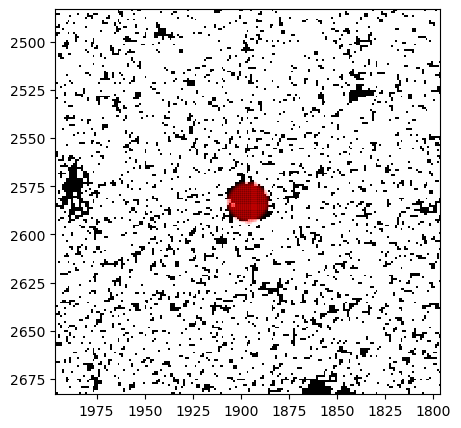

In [524]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [525]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [526]:
np.round(mag,3)

23.519

## F140W

In [527]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==233)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1166432847.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1166432847.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(733.2131979695431, 773.2131979695431)

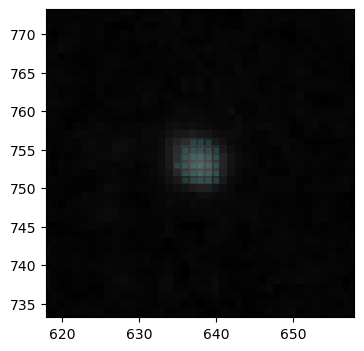

In [528]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-18.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [529]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [530]:
np.round(mag,3)

22.328

## F160W

In [531]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==257)
x0, y0 = np.mean(seg_map_gal_x)-.75, np.mean(seg_map_gal_y)-1
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 45*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/3)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/3)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(736.543352601156, 776.543352601156)

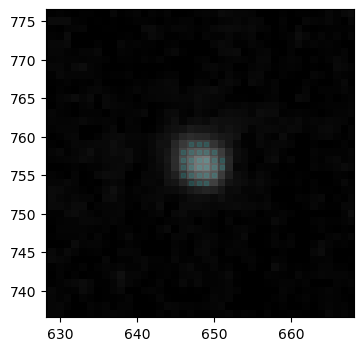

In [532]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [533]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [534]:
np.round(mag,3)

22.202

# z=1.2256

## F814W

In [535]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==5633)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3931600650.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3931600650.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


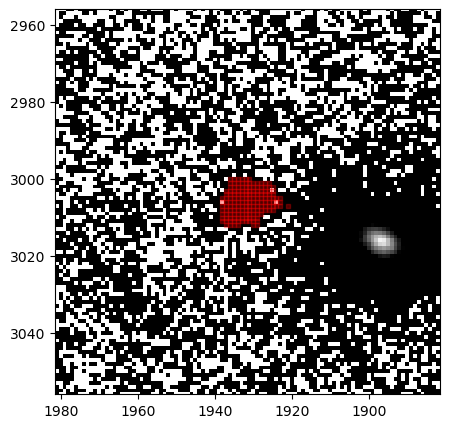

In [536]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.3)

dwin = 50
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [537]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [538]:
np.round(mag,3)

24.765

## F140W

In [550]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==452)
x0, y0 = np.mean(seg_map_gal_x)-.5, np.mean(seg_map_gal_y)-3.25

idx = np.where(((seg_map_gal_x-x0-1)/2.25)**2+((seg_map_gal_y-y0)/2.25)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1201674757.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1201674757.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(568.946261682243, 608.946261682243)

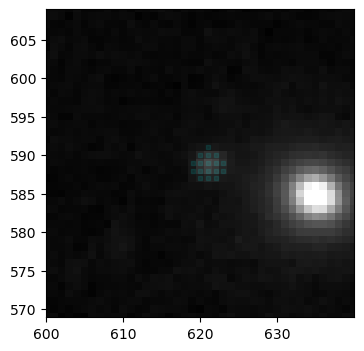

In [551]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [552]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [553]:
np.round(mag,3)

23.365

## F160W

In [554]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==465)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)-0.25

idx = np.where(((seg_map_gal_x-x0)/2.25)**2+((seg_map_gal_y-y0)/2.25)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2793059292.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2793059292.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(572.1590909090909, 612.1590909090909)

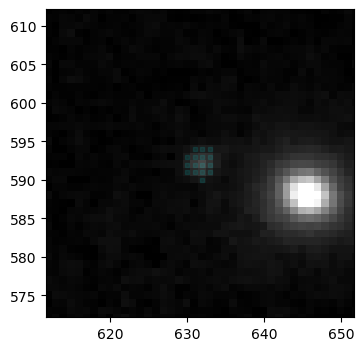

In [556]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [557]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [559]:
np.round(mag,3)

23.254

# z=1.2787

## F814W

In [560]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_814w[0].data==7389)
x0, y0 = np.mean(seg_map_gal_x), np.mean(seg_map_gal_y)
idx = np.where((seg_map_gal_x-x0)**2+(seg_map_gal_y-y0)**2<20**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3931600650.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/3931600650.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


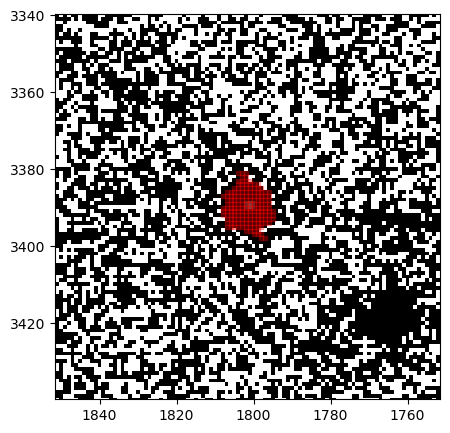

In [561]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-19, cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s', 
           color='red', s=10, alpha=.3)

dwin = 50
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [562]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [563]:
np.round(mag,3)

24.031

## F140W

In [564]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==563)
x0, y0 = np.mean(seg_map_gal_x)-0.5, np.mean(seg_map_gal_y)-.25

idx = np.where(((seg_map_gal_x-x0-1)/3.2)**2+((seg_map_gal_y-y0)/3.2)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1201674757.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1201674757.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(419.0258620689655, 459.0258620689655)

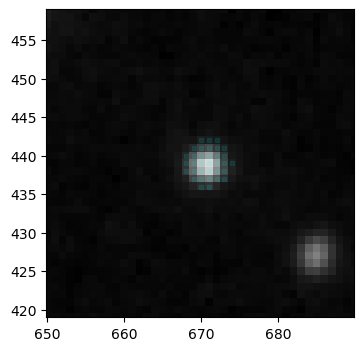

In [565]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [566]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [567]:
np.round(mag,3)

22.043

## F160W

In [568]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==570)
x0, y0 = np.mean(seg_map_gal_x)+.5, np.mean(seg_map_gal_y)-.5

idx = np.where(((seg_map_gal_x-x0)/3)**2+((seg_map_gal_y-y0)/3)**2<1**2)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2793059292.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/2793059292.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(422.5285714285714, 462.5285714285714)

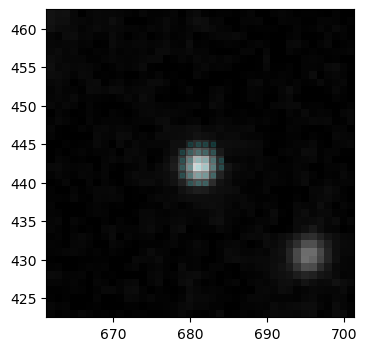

In [569]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19., cmap='gray')

ax.scatter(seg_map_gal_x[idx], seg_map_gal_y[idx], marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [570]:
counts_tot = 0

for idx in list(idx[0]):
    x = seg_map_gal_x[idx]
    y = seg_map_gal_y[idx]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [571]:
np.round(mag,3)

22.006

# z=1.2988

## F140W

In [580]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_140w[0].data==23)
x0, y0 = np.mean(seg_map_gal_x)-5, np.mean(seg_map_gal_y)-2
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 65*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1166432847.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/1166432847.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(6.049907578558226, 46.049907578558226)

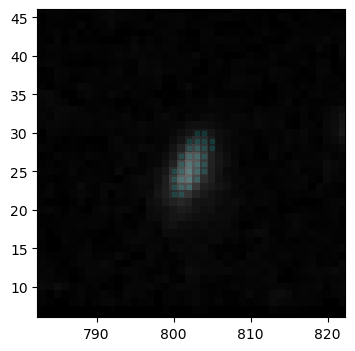

In [581]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-18.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [582]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [583]:
np.round(mag,3)

22.141

## F160W

In [584]:
seg_map_gal_y, seg_map_gal_x = np.where(seg_fits_160w[0].data==20)
x0, y0 = np.mean(seg_map_gal_x)-2, np.mean(seg_map_gal_y)-2
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 65*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_9862/4127469715.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(8.778688524590162, 48.778688524590166)

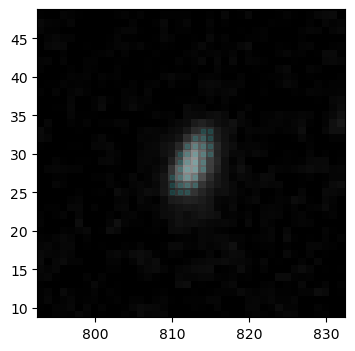

In [585]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-19, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [586]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [587]:
np.round(mag,3)

21.962

# z=1.0448?

## F814W

In [55]:
x0, y0 = 2499, 2927
x = np.arange(seg_fits_814w[0].data.shape[1])
y = np.arange(seg_fits_814w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 60*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/13)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/5)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_50190/823074394.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_50190/823074394.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',


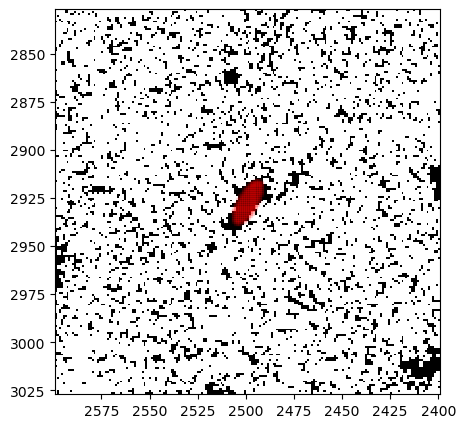

In [56]:
fig, ax = plt.subplots(1, figsize=(5,5))

plt.imshow(np.log10(img_fits_814w[0].data*img_fits_814w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20, vmax=-18.5, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s', 
           color='red', s=10, alpha=.1)

dwin = 100
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)
ax.invert_yaxis()
ax.invert_xaxis()


# Projection utilizes the WCS object created earlier
#plt.subplot(projection=wcs)

#plt.grid(color='white', ls='solid')

In [57]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_814w[0].data[y,x]

flux_tot = counts_tot*3.34e+4*img_fits_814w[0].header['PHOTPLAM']**2*img_fits_814w[0].header['PHOTFLAM']
mag = -2.5*np.log10(flux_tot/3631)

In [58]:
np.round(mag,3)

23.913

## F140W

In [47]:
x0, y0 = 400, 622
x = np.arange(seg_fits_140w[0].data.shape[1])
y = np.arange(seg_fits_140w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 60*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_50190/62569464.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_50190/62569464.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',


(602.0, 642.0)

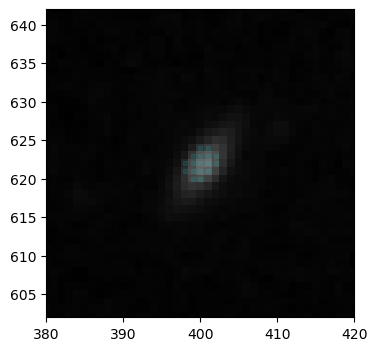

In [48]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_140w[0].data*img_fits_140w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20.0, vmax=-18., cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [49]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_140w[0].data[y,x]

flux_tot = counts_tot*img_fits_140w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [50]:
np.round(mag,3)

22.271

## F160W

In [51]:
x0, y0 = 411, 625
x = np.arange(seg_fits_160w[0].data.shape[1])
y = np.arange(seg_fits_160w[0].data.shape[0])
X,Y = np.meshgrid(x,y)
A = 60*np.pi/180
gal_y, gal_x = np.where((((X-x0)*np.cos(A)+(Y-y0)*np.sin(A))/2.5)**2+(((X-x0)*np.sin(A)-(Y-y0)*np.cos(A))/2)**2<1)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_50190/3485911289.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_50190/3485911289.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',


(605.0, 645.0)

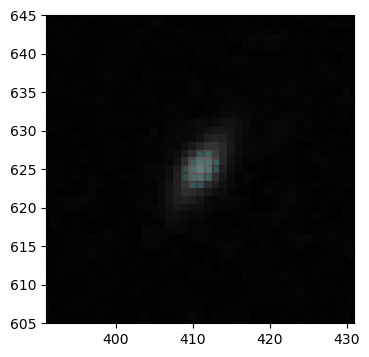

In [52]:
fig, ax = plt.subplots(1, figsize=(4,4))

plt.imshow(np.log10(img_fits_160w[0].data*img_fits_160w[0].header['PHOTFLAM']), origin='lower',
          vmin=-20., vmax=-18, cmap='gray')

ax.scatter(gal_x, gal_y, marker='s',  
           color='cyan', s=10, alpha=.1)

dwin = 20
ax.set_xlim(x0-dwin,x0+dwin)
ax.set_ylim(y0-dwin,y0+dwin)

In [53]:
counts_tot = 0

for i in range(len(gal_x)):
    x = gal_x[i]
    y = gal_y[i]
    counts_tot += img_fits_160w[0].data[y,x]

flux_tot = counts_tot*img_fits_160w[0].header['PHOTFNU']
mag = -2.5*np.log10(flux_tot/3631)

In [54]:
np.round(mag,3)

22.012

# DRAFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants, units
from astropy.coordinates import Angle
from scipy.optimize import curve_fit
import pandas as pd
import os
from scipy.signal import medfilt

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/MUSE/'

Load in the segmentation map for galaxy IDs

In [3]:
cat_file = np.loadtxt(rootdir + 'test_new_updated.cat')

In [4]:
gal_ids_arr = np.int_(cat_file[:,0])
z_ids_arr = cat_file[:,12]

In [5]:
gal_id = 1

In [6]:
idx = np.where(gal_ids_arr==gal_id)[0][0]

In [7]:
z_best = z_ids_arr[idx]

In [8]:
gal_spec_arr = np.loadtxt(rootdir+'gal{}/gal{}_spec.dat'.format(gal_id, gal_id), delimiter='\t')

In [9]:
wav_arr = gal_spec_arr[:,0]
gal_spec_raw = gal_spec_arr[:,1]
gal_spec_err = gal_spec_arr[:,2]
gal_spec_fit = gal_spec_arr[:,3]

In [10]:
B_center = 4450
B_fwhm = 940
B_sigma = B_fwhm/(2*np.sqrt(2*np.log(2)))

V_center = 5510
V_fwhm = 880
V_sigma = V_fwhm/(2*np.sqrt(2*np.log(2)))

In [11]:
n_span = 1

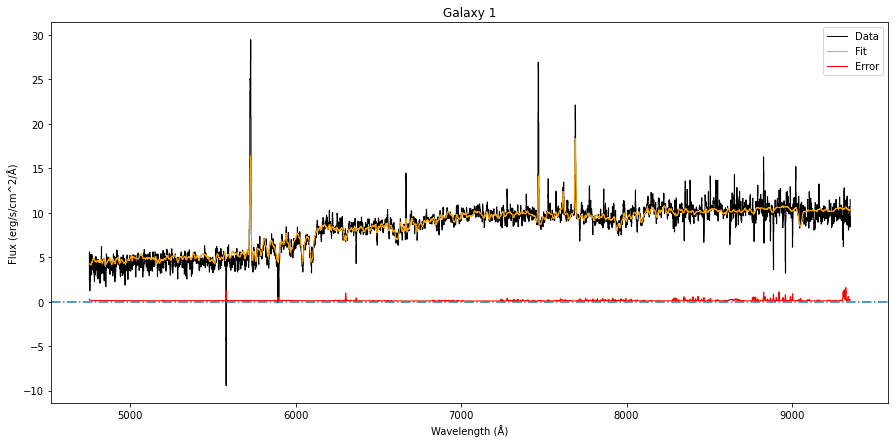

In [13]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.step(wav_arr, gal_spec_raw, label='Data', color='black', lw=1, where='mid')
ax.step(wav_arr, gal_spec_fit, label='Fit', color='orange', lw=1, where='mid')
ax.step(wav_arr, gal_spec_err, label='Error', color='red', lw=1, where='mid')

ax.axhline(0, linestyle='-.')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (erg/s/cm^2/Å)')
ax.set_title('Galaxy {}'.format(gal_id))

ax.legend()